In [21]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Helper functions

In [22]:
from PIL import Image
import os
import pandas as pd
import pylab as pl

In [23]:
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)

## Load data

In [24]:
img_dir = os.path.join(os.getcwd(), "images") # directory path
images = load_images(img_dir) # load images in the specified directory

In [25]:
X = pd.DataFrame([im.histogram() for im in images])

## Start your assignment here...

### Part 1

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

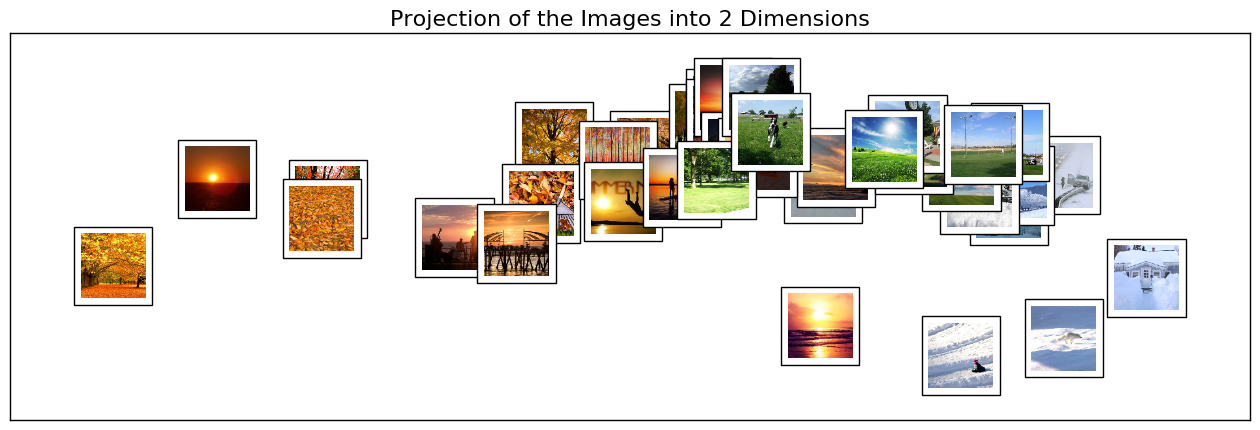

In [27]:
plot_image_space(images, X_r)

### Part 2

1. Two images being close together means the features of these images are close in values. Two images being far apart means they have quite different values for the same feature.

2. Yes, images corresponding to one of the seasons tend to group together more closely than others. Because images of the same season tend to have similar color, for example, images of the fall are mostly golden, and images of the winter are mostly white. 

### Part 3

I collected a total of 30 images, 5 Marvel's super heros, 6 images of each character. Super heros have their uniforms, so I am interested to see if principal component analysis can differentiate super heros apart.

In [28]:
img_dir2 = os.path.join(os.getcwd(), "images2") # directory path
images2 = load_images(img_dir2) # load images in the specified directory
X2 = pd.DataFrame([im.histogram() for im in images2])

In [29]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r2 = pca.fit(X2).transform(X2)

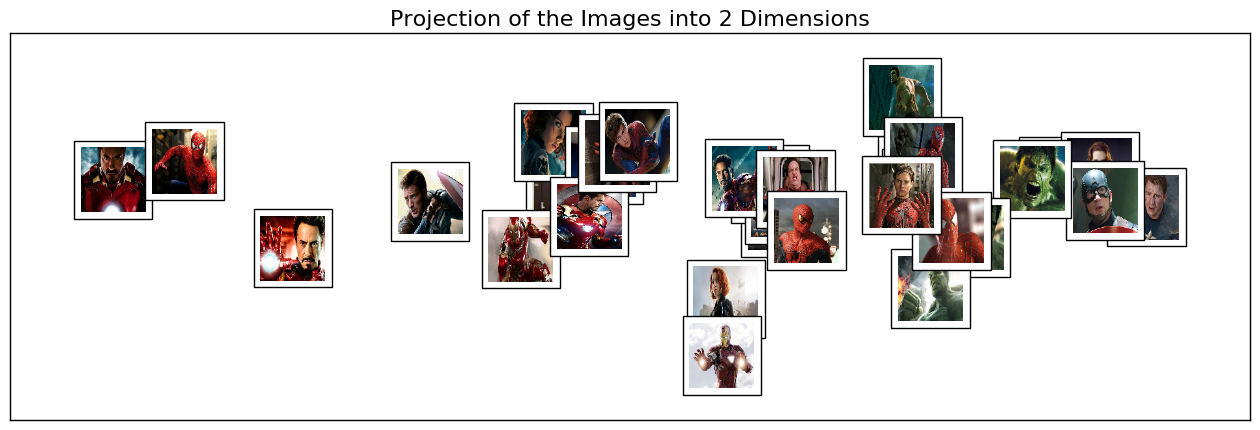

In [30]:
plot_image_space(images2, X_r2)

Looks like PCA has done its job. 
* We can see images of Iron Man and Hulk have their own clusters. I think it is because Iron Man has that hand laser, and Hulk is green. 
* I found background color has played a very important role other than character's colors. Darker background color tend to be clustered on the upper/right side, and lighter background color are more likely to be in the middle/lower side. 
* Another importatn factor is the type of picture. Profile pictures seem to be clustered togeter (on the right side, profile pictures of several super heros are close despite they are so different in character and color), and pictures of upper body or similar posese are close in the middle. 
＊The only part I found strange is some pictures of spider man is clustered with Hulk. I am not sure why.